In [1]:
from libs.util import *
from libs.dynamic import *

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/financial-b1.csv')

In [3]:
number_of_nodes = 8
offset = 16
exclude = [3, 22]

matrix = []
for row in df.values:
    prow = []
    for i, x in enumerate(row):
        if i not in exclude:
            prow.append(x/1000)
    matrix.append(np.array(prow[1+offset:offset+number_of_nodes+1]))
matrix = np.array(matrix)
    
train_size = int(len(matrix) * 0.8)
train = matrix[:train_size] 
future = matrix[train_size:]
print(len(matrix), len(train), len(future))

290 232 58


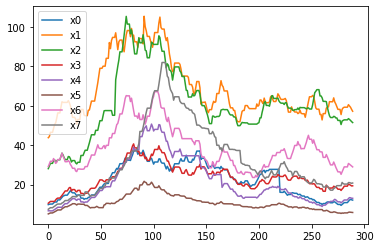

In [4]:
plot_flow(matrix)

In [5]:
import pysindy as ps

dt = 0.01

model = ps.SINDy()
model.fit(train, t=dt)
model.print()

x0' = 501.931 1 + -13.409 x0 + -26.871 x1 + 36.066 x2 + -34.324 x3 + -44.682 x4 + 7.322 x5 + 15.994 x6 + 12.318 x7 + -3.477 x0^2 + 1.820 x0 x1 + 1.547 x0 x2 + 4.104 x0 x3 + 5.187 x0 x4 + 6.143 x0 x5 + -7.162 x0 x6 + -1.438 x0 x7 + 0.165 x1^2 + -0.795 x1 x2 + -0.663 x1 x3 + -2.512 x1 x4 + 3.996 x1 x5 + 0.689 x1 x6 + 0.424 x1 x7 + -0.278 x2^2 + -0.428 x2 x3 + 2.178 x2 x4 + -8.595 x2 x5 + 2.140 x2 x6 + -0.355 x2 x7 + -1.978 x3^2 + -3.870 x3 x4 + 0.916 x3 x5 + 4.291 x3 x6 + 0.353 x3 x7 + 4.975 x4 x5 + 1.635 x4 x6 + -1.344 x4 x7 + -11.643 x5^2 + 1.542 x5 x6 + 2.315 x5 x7 + -2.265 x6^2 + -0.162 x6 x7 + 0.273 x7^2
x1' = -703.321 1 + 185.600 x0 + 0.201 x1 + -28.044 x2 + 213.005 x3 + -140.115 x4 + -517.772 x5 + 64.794 x6 + 0.039 x7 + -4.984 x0^2 + 0.982 x0 x1 + 4.040 x0 x2 + -6.491 x0 x3 + 7.006 x0 x4 + -15.866 x0 x5 + -4.387 x0 x6 + 2.371 x0 x7 + 0.238 x1^2 + -1.659 x1 x2 + -1.658 x1 x3 + 2.032 x1 x5 + 0.842 x1 x6 + 0.945 x1 x7 + -0.297 x2^2 + -2.278 x2 x3 + -2.903 x2 x4 + 7.586 x2 x5 + 3.566 

In [8]:
# perturbed = create_perturbed_state(2, 8, steady_state)
perturbed = future[0]
x_perturbed = apply_perturbation(model, perturbed, sindy, dt)
perturbed_steady_state = find_steady_state(x_perturbed)
print('perturbed_steady_state:', perturbed_steady_state)

perturbed_steady_state: [0. 0. 0. 0. 0. 0. 0. 0.]


<Figure size 1152x648 with 0 Axes>

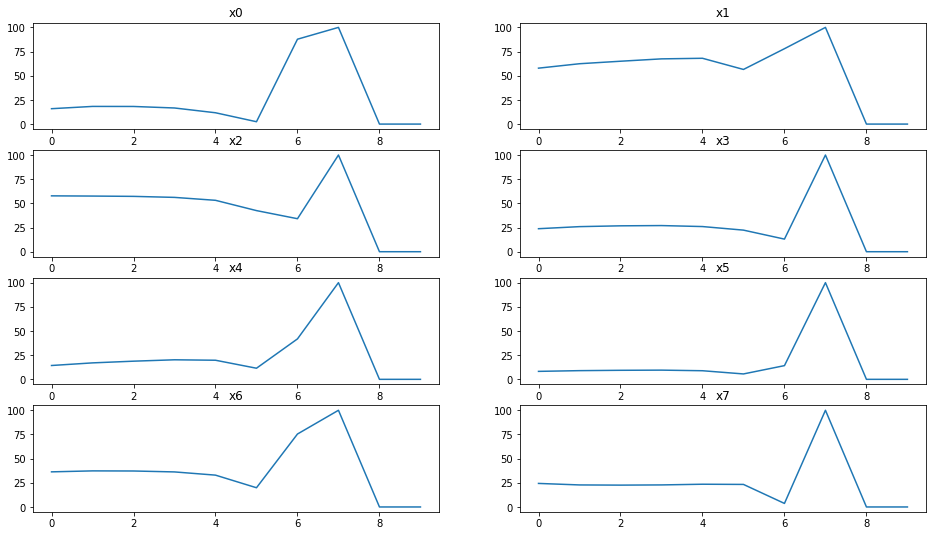

In [9]:
x_flow = flow(x_perturbed, start=1, stop=50)
plot_flow(x_flow, 'multi')

<Figure size 1152x648 with 0 Axes>

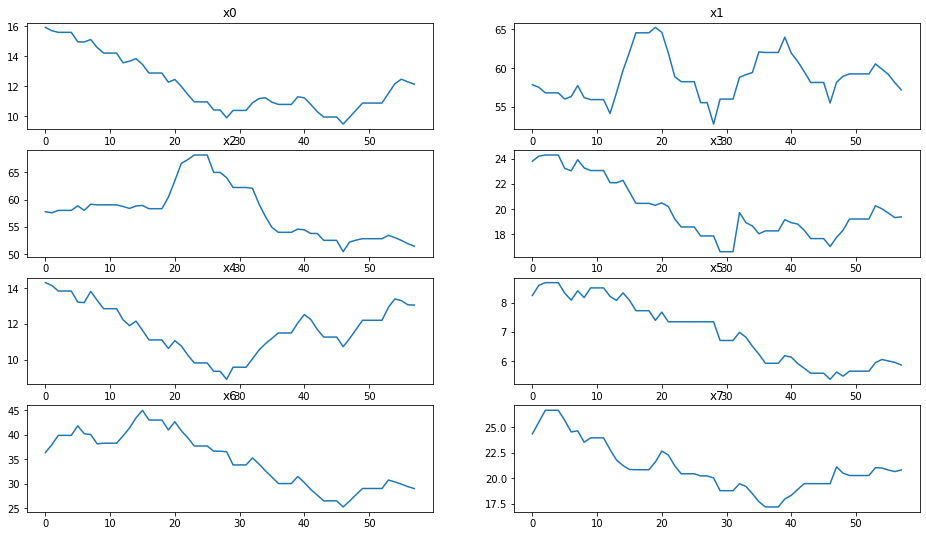

In [10]:
plot_flow(future, 'multi')

[0.0, 0.04351239469835683, 0.07416260092120162, 0.09293529461504892, 0.10802374541298594, 0.13665747984563462, 0.30927358409178607, 0.7694150902005625, 0.7950356357338333]


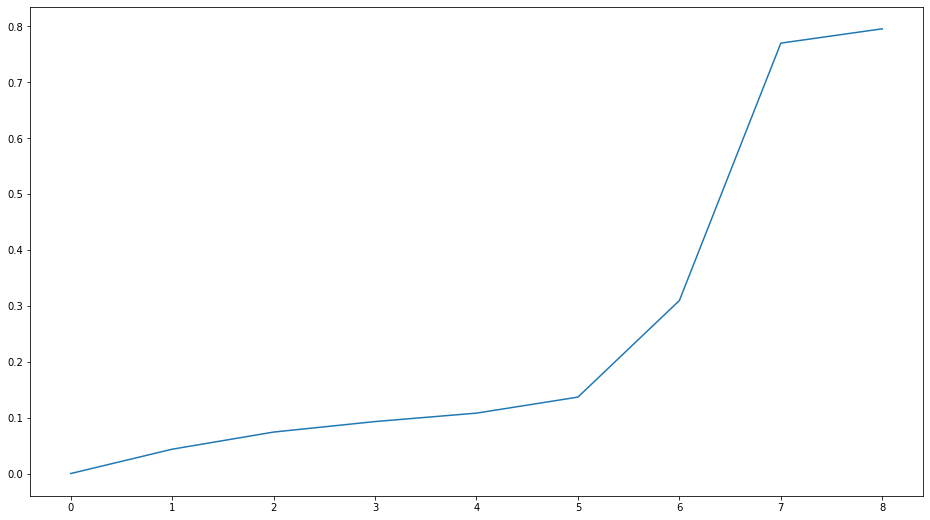

In [13]:
prediction_error_matrix = [flow_prediction_error(x_flow, future, i) for i in range(1,10)]
prediction_error = [sum(error)/number_of_nodes for error in prediction_error_matrix]

#print(prediction_error_matrix)
print(prediction_error)
plt.figure(2)
plt.plot(prediction_error)